# Descriptive Statistics of Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from scipy.stats import linregress

In [15]:
# Creating a directed graph
# Replace with your data address!
# We should have a "data" folder in the repo :)
df = pd.read_csv('/Users/katy/github-innovation-graph/data/economy_collaborators.csv')
G = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=nx.DiGraph())

# Compute weighted in-degree and out-degree
in_degree = dict(G.in_degree(weight='weight'))
out_degree = dict(G.out_degree(weight='weight'))

## Version 1: 
Directly computes the histogram of the degree values.
**CCDF = 1 - CDF**

This version might smooth over some of the details in the data, as it bins the degree values into a histogram before computing the CCDF.

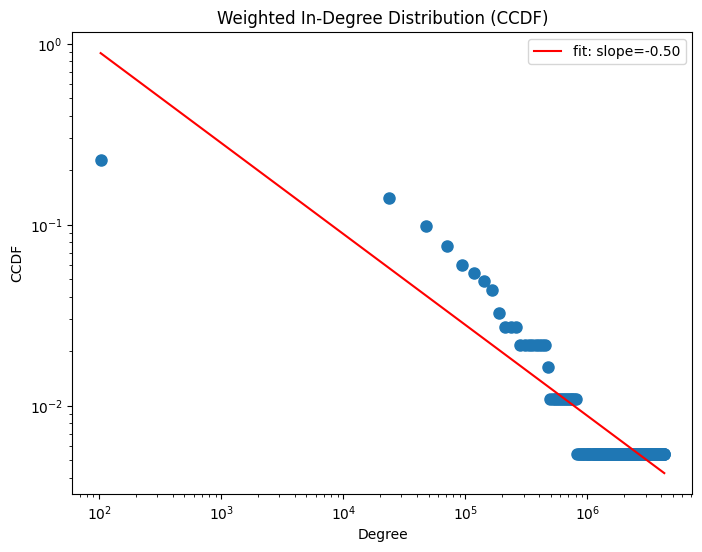

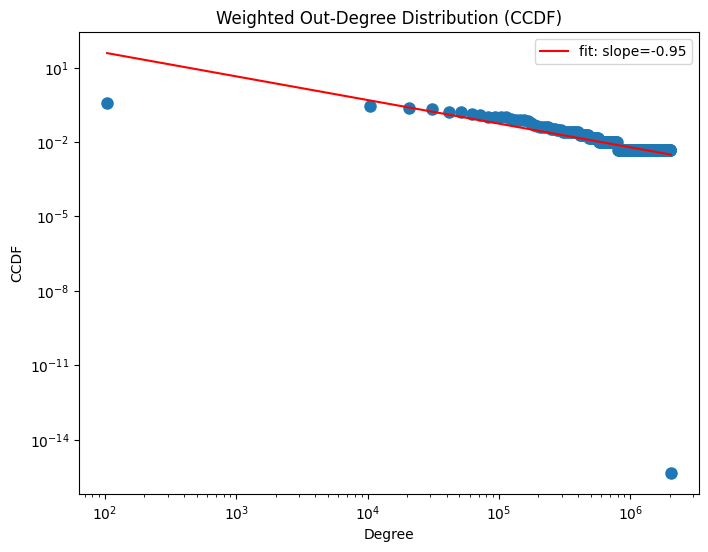

In [16]:
def plot_ccdf(degrees, title):
    # Filter out zero values
    degrees = {k: v for k, v in degrees.items() if v > 0}

    # Counting frequency
    degree_values = list(degrees.values())
    hist, bin_edges = np.histogram(degree_values, bins=len(set(degree_values)), density=True)
    cdf = np.cumsum(hist*np.diff(bin_edges))
    ccdf = 1 - cdf

    # Remove zero for log-log plot
    nonzero_indices = ccdf > 0
    bin_edges = bin_edges[:-1][nonzero_indices]
    ccdf = ccdf[nonzero_indices]

    # Best fit line
    slope, intercept, r_value, p_value, std_err = linregress(np.log(bin_edges), np.log(ccdf))
    line = np.exp(intercept) * (bin_edges**slope)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.loglog(bin_edges, ccdf, marker='o', linestyle='None', markersize=8)
    plt.loglog(bin_edges, line, 'r-', label=f'fit: slope={slope:.2f}')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('CCDF')
    plt.legend()
    plt.show()

# Plotting CCDF for weighted in-degree and out-degree
plot_ccdf(in_degree, "Weighted In-Degree Distribution (CCDF)")
plot_ccdf(out_degree, "Weighted Out-Degree Distribution (CCDF)")

## Version 2: 
Calculates the CCDF by evaluating **the proportion of nodes with degree values equal to or greater than each unique degree value in the network.**

This method tends to preserve more information about the distribution, as it considers each unique degree value without binning.

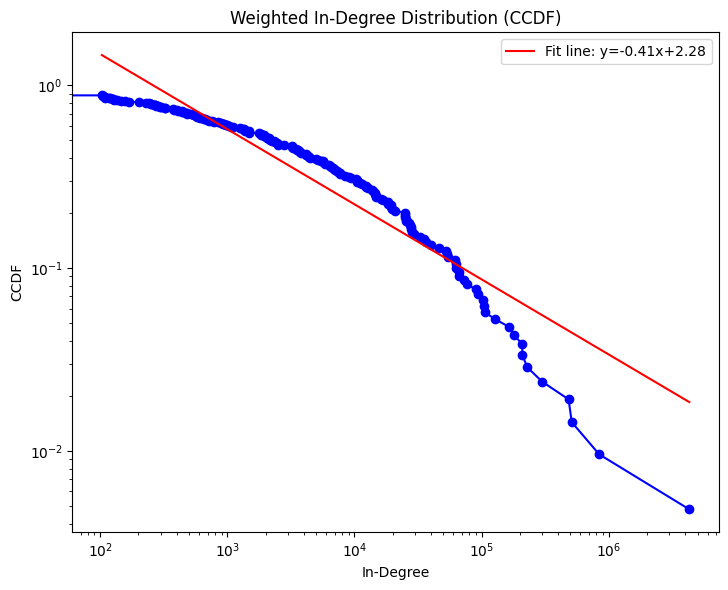

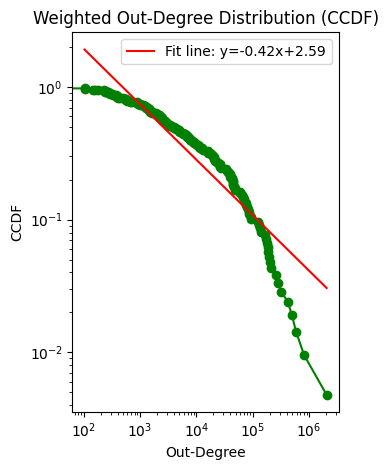

In [24]:
# Prepare data for CCDF plots
def prepare_ccdf_data(degrees):
    values = sorted(set(degrees.values()))
    ccdf = [len([v for v in degrees.values() if v >= x]) / float(len(degrees)) for x in values]
    return values, ccdf

in_values, in_ccdf = prepare_ccdf_data(in_degree)
out_values, out_ccdf = prepare_ccdf_data(out_degree)

plt.figure(figsize=(14, 6))

# Filter out zero values for log-log regression
in_values_filtered, in_ccdf_filtered = zip(*[(v, c) for v, c in zip(in_values, in_ccdf) if v > 0 and c > 0])
out_values_filtered, out_ccdf_filtered = zip(*[(v, c) for v, c in zip(out_values, out_ccdf) if v > 0 and c > 0])

# In-degree plot
plt.subplot(1, 2, 1)
plt.loglog(in_values, in_ccdf, marker='o', linestyle='-', color='b')
if in_values_filtered:
    slope, intercept, _, _, _ = linregress(np.log(in_values_filtered), np.log(in_ccdf_filtered))
    plt.plot(in_values_filtered, np.exp(intercept) * np.power(in_values_filtered, slope), color='r', label=f'Fit line: y={slope:.2f}x+{intercept:.2f}')
plt.title('Weighted In-Degree Distribution (CCDF)')
plt.xlabel('In-Degree')
plt.ylabel('CCDF')
plt.legend()

plt.tight_layout()
plt.show()

# Out-degree plot
plt.subplot(1, 2, 2)
plt.loglog(out_values, out_ccdf, marker='o', linestyle='-', color='g')
if out_values_filtered:
    slope, intercept, _, _, _ = linregress(np.log(out_values_filtered), np.log(out_ccdf_filtered))
    plt.plot(out_values_filtered, np.exp(intercept) * np.power(out_values_filtered, slope), color='r', label=f'Fit line: y={slope:.2f}x+{intercept:.2f}')
plt.title('Weighted Out-Degree Distribution (CCDF)')
plt.xlabel('Out-Degree')
plt.ylabel('CCDF')
plt.legend()

plt.tight_layout()
plt.show()